## SRPT vs. BASRPT

In [47]:
import trafpy
import trafpy.generator as tpg

import os
import pickle
import matplotlib.pyplot as plt

path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/testbed_data/ndf50_uniform_testbed_data_V10basrpt.obj'
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())

dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [48]:
envs = tb_dict['envs']
print(envs)

[<trafpy.manager.src.simulators.dcn.DCN object at 0x7f72b2083dc0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7310ed9880>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72ec1e9cd0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72f8f63880>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72b26fd880>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f73064056a0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72c6fe96a0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f73023da100>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72f21b16d0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72ed7ec5e0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72ecb92910>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72b2133fa0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72e2724610>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72c79f6d60>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72d41eb220>, <trafpy.m

## TODO

### Key Stats to Compare
- Average flow completion time
- 99th percentile flow completion time
- Queue length
- Throughput

### Key Plots

In [49]:
for env in envs:
    print('Net capacity: {}'.format(env.network.graph['max_nw_capacity']))
    print(env.get_scheduling_session_summary(print_summary=True))

Net capacity: 117.0
-=-=-=-=-=-=-= Scheduling Session Ended -=-=-=-=-=-=-=
SUMMARY:
~* General Info *~
Simulation name: 'benchmark_uniform_load_0.1_repeat_0_scheduler_srpt'
Total session duration: 5516000.0 time units
Total number of generated demands (jobs or flows): 3000
Total info arrived: 15130017.0 info units
Load: 11.49965586659874 info unit demands arrived per unit time (from first to last flow arriving)
Total info transported: 15130017.0 info units
Throughput: 2.7429327411167512 info units transported per unit time

~* Flow Info *~
Total number generated flows (src!=dst,dependency_type=='data_dep'): 3000
Time first flow arrived: 0.0 time units
Time last flow arrived: 1315693.0238187218 time units
Time first flow completed: 6000.0 time units
Time last flow completed: 5516000.0 time units
Total number of demands that arrived and became flows: 3000
Total number of flows that were completed: 3000
Total number of dropped flows + flows in queues at end of session: 0
Average FCT: 1239

In [50]:
# collect testbed stats into dict
testbed_stats = {'test_{}'.format(i): 
                 {envs[i].scheduler.scheduler_name: 
                  {'load_rate': envs[i].load, 
                   'load_frac': envs[i].load/envs[i].network.graph['max_nw_capacity'],
                   'avrg_fct': envs[i].avrg_fct,
                   'nn_fct': envs[i].nn_fct,
                   'q_dict': envs[i].queue_evolution_dict,
                   'throughput': envs[i].throughput}
                 } for i in range(len(envs))}

# find classes
classes = []
for test in testbed_stats.keys():
    for _class in testbed_stats[test].keys():
        if _class not in classes:
            classes.append(_class)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


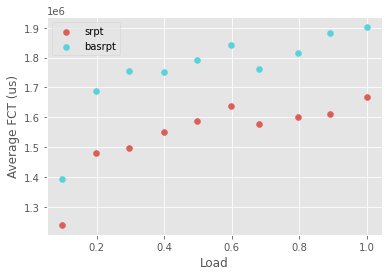

In [51]:
# avrg fct
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['load_frac'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['avrg_fct'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='Load', ylabel='Average FCT (us)', show_fig=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


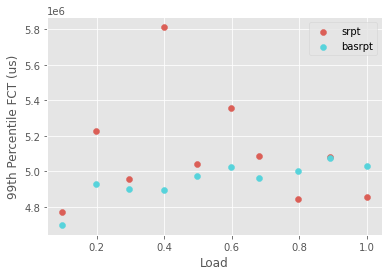

In [52]:
# 99th percentile fct
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['load_frac'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['nn_fct'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='Load', ylabel='99th Percentile FCT (us)', show_fig=True)

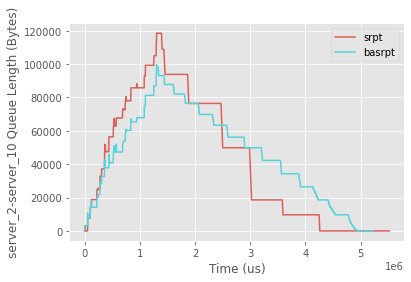

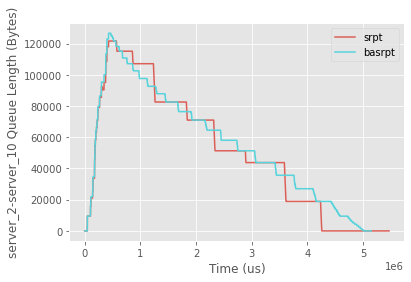

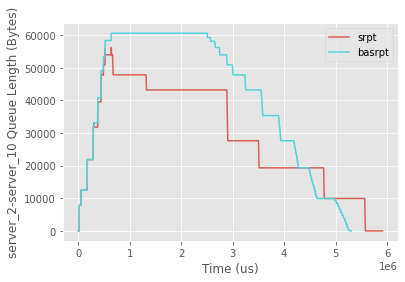

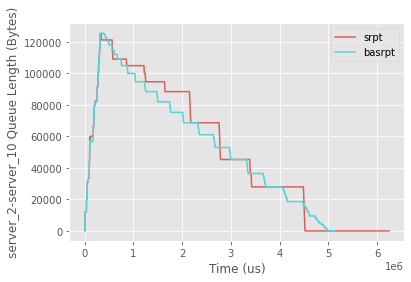

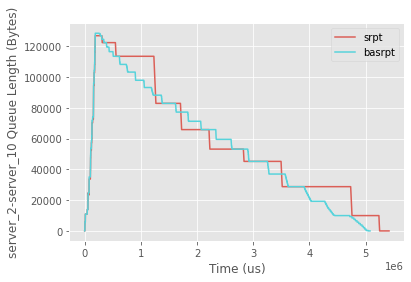

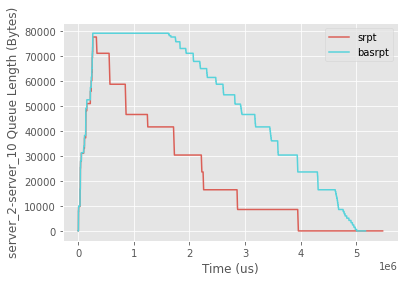

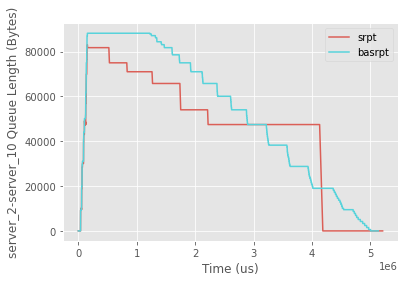

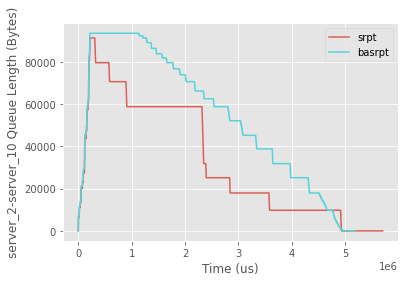

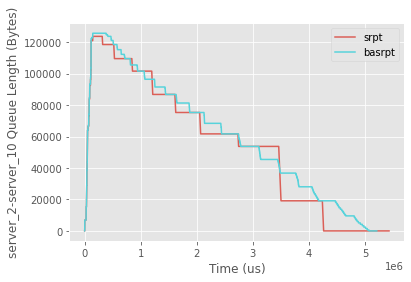

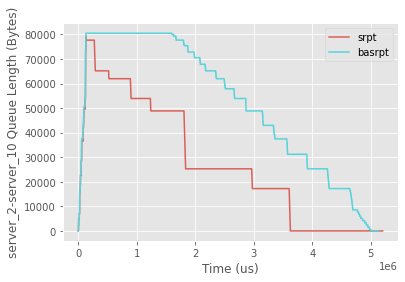

In [53]:
import numpy

# queue length
plot_dict = {}
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    try:
        plot_dict[load][_class]['x_values'] = None
        plot_dict[load][_class]['y_values'] = None
    except KeyError:
        # not yet added this load
        try:
            plot_dict[load][_class] = {}
            plot_dict[load][_class]['x_values'] = None
            plot_dict[load][_class]['y_values'] = None
        except KeyError:
            plot_dict[load] = {}
            plot_dict[load][_class] = {}
            plot_dict[load][_class]['x_values'] = None
            plot_dict[load][_class]['y_values'] = None

src = 'server_2'
dst='server_10'
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    plot_dict[load][_class]['x_values'] = testbed_stats[test][_class]['q_dict'][src][dst]['times'] 
    plot_dict[load][_class]['y_values'] = testbed_stats[test][_class]['q_dict'][src][dst]['queue_lengths']
    
for load in plot_dict.keys():
    tpg.plot_val_line(plot_dict=plot_dict[load],xlabel='Time (us)', ylabel='{}-{} Queue Length (Bytes)'.format(src,dst), show_fig=True)

{0.09828765697947642: {'x_values': ['s', 'b'], 'y_values': [2.7429327411167512, 2.8929286806883363]}, 0.29649175430226243: {'x_values': ['s', 'b'], 'y_values': [2.73857981349424, 2.9087770440862304]}, 0.19747621645082467: {'x_values': ['s', 'b'], 'y_values': [2.5741834629692257, 2.869692931196984]}, 0.3976718504614404: {'x_values': ['s', 'b'], 'y_values': [2.3972478783026423, 2.913743285325029]}, 0.6808539710986419: {'x_values': ['s', 'b'], 'y_values': [2.750172572905131, 2.9331564960629923]}, 0.4963804864387383: {'x_values': ['s', 'b'], 'y_values': [2.7689167579408545, 2.9344410911201395]}, 0.7965645706035286: {'x_values': ['s', 'b'], 'y_values': [2.863615163147793, 2.90600603817686]}, 0.5978420042657954: {'x_values': ['s', 'b'], 'y_values': [2.650699439186821, 2.9147988051647715]}, 0.891446994886186: {'x_values': ['s', 'b'], 'y_values': [2.8059305325225723, 2.9239218509984637]}, 0.999558680245517: {'x_values': ['s', 'b'], 'y_values': [2.911388119953864, 2.948226786061904]}}


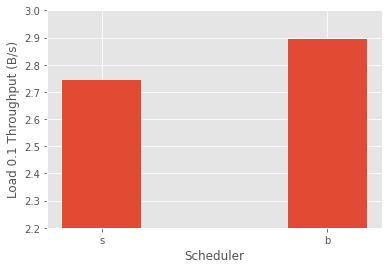

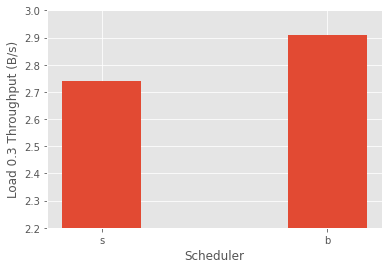

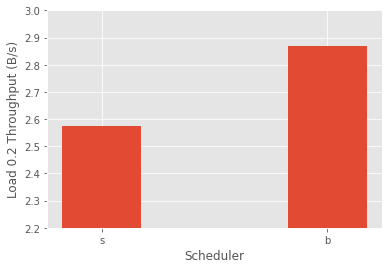

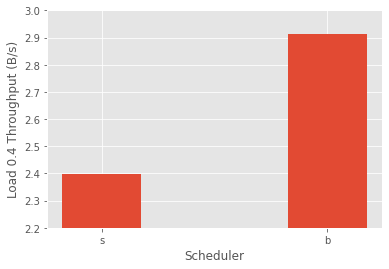

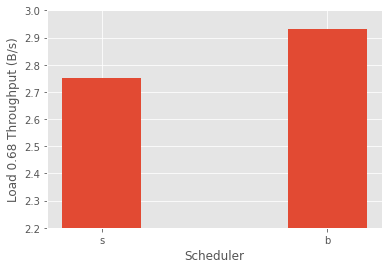

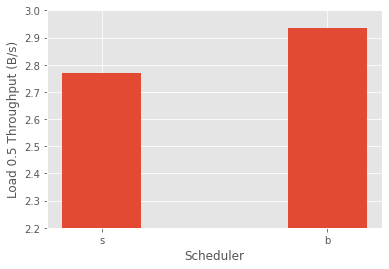

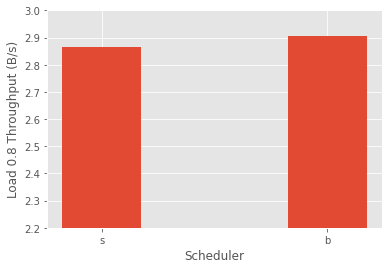

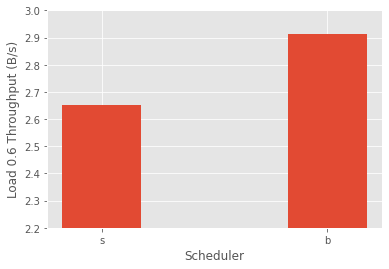

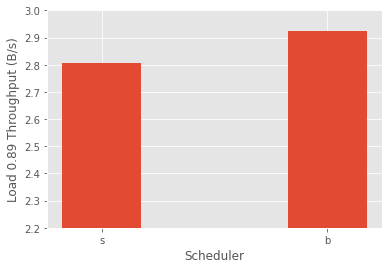

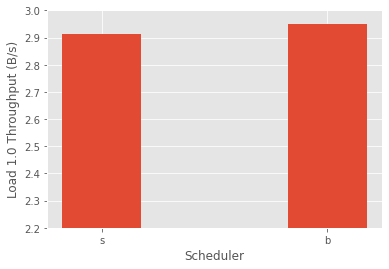

In [54]:
# throughput
plot_dict = {}
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    try:
        plot_dict[load]['x_values'].append(_class[0])
        plot_dict[load]['y_values'].append(testbed_stats[test][_class]['throughput'])
    except KeyError:
        try:
            plot_dict[load] = {}
            plot_dict[load]['x_values'].append(_class[0])
            plot_dict[load]['y_values'].append(testbed_stats[test][_class]['throughput'])
        except KeyError:
            plot_dict[load] = {}
            plot_dict[load]['x_values'] = []
            plot_dict[load]['y_values'] = []
            plot_dict[load]['x_values'].append(_class[0])
            plot_dict[load]['y_values'].append(testbed_stats[test][_class]['throughput'])
    
print(plot_dict)
for load in plot_dict.keys():
    tpg.plot_val_bar(x_values=plot_dict[load]['x_values'],y_values=plot_dict[load]['y_values'],xlabel='Scheduler', ylabel='Load {} Throughput (B/s)'.format(str(round(load,2))), ylim=[2.2,3], show_fig=True)

## Tuning BASRPT

In [11]:
import trafpy
import trafpy.generator as tpg

import os
import pickle
import matplotlib.pyplot as plt

path_to_benchmark_data = os.path.dirname(trafpy.__file__)+'/../data/testbed_data/ndf10_university_testbed_data_basrpt_tuning.obj'
filehandler = open(path_to_benchmark_data, 'rb')
tb_dict = pickle.load(filehandler)

print(tb_dict.keys())




dict_keys(['benchmark_data', 'benchmarks', 'envs', 'config'])


In [12]:
envs = tb_dict['envs']
print(envs)

[<trafpy.manager.src.simulators.dcn.DCN object at 0x7f7319d6c8b0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7319c87070>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7319a56c10>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7316e41af0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7316b9c1c0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f730f3d6c10>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f730f1b7490>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7312e392e0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7312b9eee0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7303bd9610>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f73039b16a0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f73037113d0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f7300c18700>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f73009f96d0>, <trafpy.manager.src.simulators.dcn.DCN object at 0x7f72f6b99340>, <trafpy.m

## TODO

### Key Stats to Compare
- Throughput vs. V
- Average FCT vs. V
- 99th Percentile vs. V
- Queue Evolution (V composite)

### Key Plots

In [14]:
for env in envs:
    print('Net capacity: {}'.format(env.network.graph['max_nw_capacity']))
    print(env.get_scheduling_session_summary(print_summary=True))

Net capacity: 117.0
-=-=-=-=-=-=-= Scheduling Session Ended -=-=-=-=-=-=-=
SUMMARY:
~* General Info *~
Simulation name: 'benchmark_university_load_1.0_repeat_0_scheduler_V200_basrpt'
Total session duration: 966000.0 time units
Total number of generated demands (jobs or flows): 600
Total info arrived: 1850619.0 info units
Load: 115.06229053275509 info unit demands arrived per unit time (from first to last flow arriving)
Total info transported: 1850619.0 info units
Throughput: 1.915754658385093 info units transported per unit time

~* Flow Info *~
Total number generated flows (src!=dst,dependency_type=='data_dep'): 600
Time first flow arrived: 0.0 time units
Time last flow arrived: 16083.627324220348 time units
Time first flow completed: 1000.0 time units
Time last flow completed: 966000.0 time units
Total number of demands that arrived and became flows: 600
Total number of flows that were completed: 600
Total number of dropped flows + flows in queues at end of session: 0
Average FCT: 22

-=-=-=-=-=-=-= Scheduling Session Ended -=-=-=-=-=-=-=
SUMMARY:
~* General Info *~
Simulation name: 'benchmark_university_load_0.5_repeat_0_scheduler_V50_basrpt'
Total session duration: 1092000.0 time units
Total number of generated demands (jobs or flows): 600
Total info arrived: 1941749.0 info units
Load: 56.0924082346491 info unit demands arrived per unit time (from first to last flow arriving)
Total info transported: 1941749.0 info units
Throughput: 1.778158424908425 info units transported per unit time

~* Flow Info *~
Total number generated flows (src!=dst,dependency_type=='data_dep'): 600
Time first flow arrived: 0.0 time units
Time last flow arrived: 34616.96620115079 time units
Time first flow completed: 1000.0 time units
Time last flow completed: 1092000.0 time units
Total number of demands that arrived and became flows: 600
Total number of flows that were completed: 600
Total number of dropped flows + flows in queues at end of session: 0
Average FCT: 245868.89979710002 time 

In [16]:
# collect testbed stats into dict
testbed_stats = {'test_{}'.format(i): 
                 {envs[i].scheduler.scheduler_name: 
                  {'load_rate': envs[i].load, 
                   'load_frac': envs[i].load/envs[i].network.graph['max_nw_capacity'],
                   'avrg_fct': envs[i].avrg_fct,
                   'nn_fct': envs[i].nn_fct,
                   'q_dict': envs[i].queue_evolution_dict,
                   'throughput': envs[i].throughput,
                   'V': envs[i].scheduler.V}
                 } for i in range(len(envs))}

# find classes
classes = []
for test in testbed_stats.keys():
    for _class in testbed_stats[test].keys():
        if _class not in classes:
            classes.append(_class)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

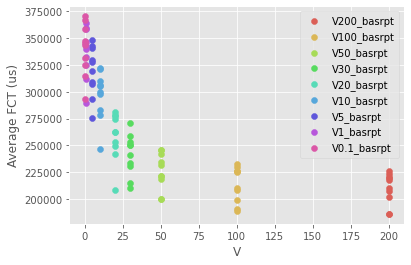

In [17]:
# avrg fct
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['V'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['avrg_fct'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='V', ylabel='Average FCT (us)', show_fig=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

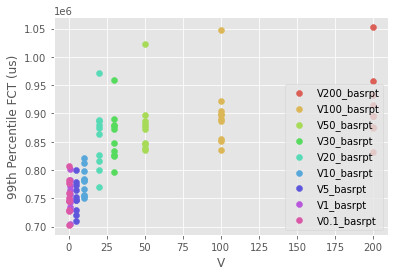

In [18]:
# 99th percentile fct
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['V'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['nn_fct'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='V', ylabel='99th Percentile FCT (us)', show_fig=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

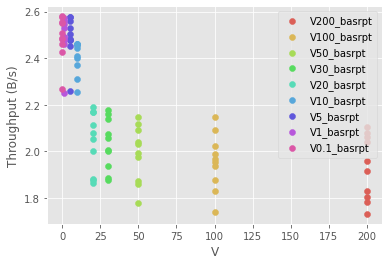

In [19]:
# throughput
plot_dict = {_class: {'x_values': [], 'y_values': []} for _class in classes}

for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    plot_dict[_class]['x_values'].append(testbed_stats[test][_class]['V'])
    plot_dict[_class]['y_values'].append(testbed_stats[test][_class]['throughput'])

fig = tpg.plot_val_scatter(plot_dict=plot_dict,xlabel='V', ylabel='Throughput (B/s)', show_fig=True)

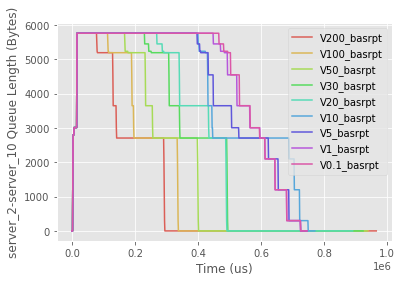

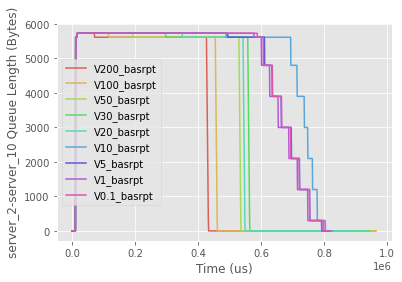

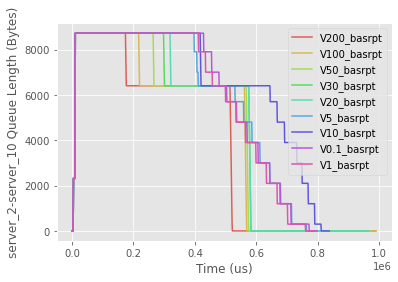

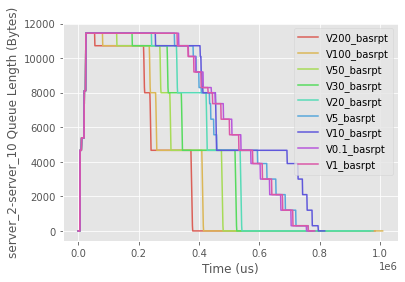

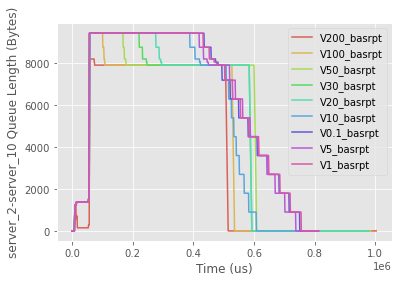

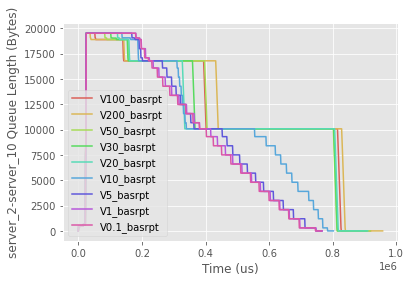

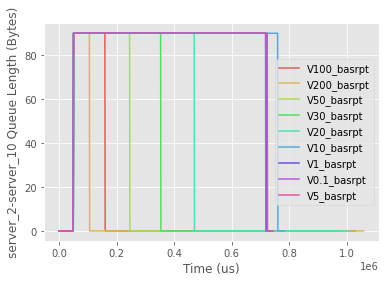

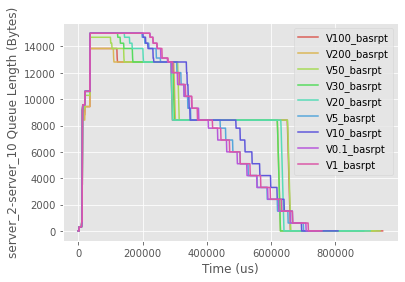

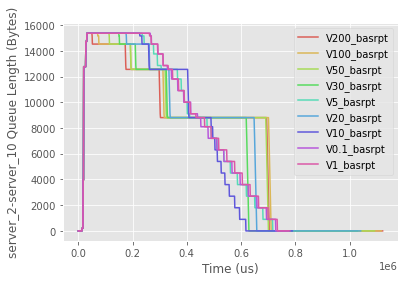

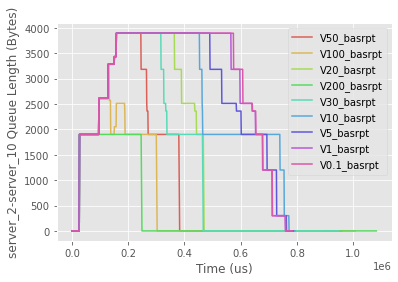

In [20]:
import numpy

# queue length
plot_dict = {}
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    try:
        plot_dict[load][_class]['x_values'] = None
        plot_dict[load][_class]['y_values'] = None
    except KeyError:
        # not yet added this load
        try:
            plot_dict[load][_class] = {}
            plot_dict[load][_class]['x_values'] = None
            plot_dict[load][_class]['y_values'] = None
        except KeyError:
            plot_dict[load] = {}
            plot_dict[load][_class] = {}
            plot_dict[load][_class]['x_values'] = None
            plot_dict[load][_class]['y_values'] = None

src = 'server_2'
dst='server_10'
for test in testbed_stats.keys():
    _class = list(testbed_stats[test].keys())[0]
    load = testbed_stats[test][_class]['load_frac']
    plot_dict[load][_class]['x_values'] = testbed_stats[test][_class]['q_dict'][src][dst]['times'] 
    plot_dict[load][_class]['y_values'] = testbed_stats[test][_class]['q_dict'][src][dst]['queue_lengths']
    
for load in plot_dict.keys():
    tpg.plot_val_line(plot_dict=plot_dict[load],xlabel='Time (us)', ylabel='{}-{} Queue Length (Bytes)'.format(src,dst), show_fig=True)